In [1]:
%pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-kwfzf_gi
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-kwfzf_gi
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=0b895b052530ab17de649858d323add1da38001ef3c6afdd3043754a4822be9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8gswvuce/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch
import clip
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt

In [13]:
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Define the target classes
target_classes = ["cat", "dog"]

# Load and preprocess the image

image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5a/Maine_Coon_cat_by_Tomitheos.JPG"
image_path = "test_image.JPG"
urllib.request.urlretrieve(image_url, image_path)
image = Image.open(image_path).convert("RGB")
image_input = preprocess(image).unsqueeze(0).to(device)

# Encode the image
with torch.no_grad():
    image_features = model.encode_image(image_input)

# Encode the target classes
text_inputs = clip.tokenize(target_classes).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)

# Compute the similarity scores
similarity_scores = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Get the predicted class
_, predicted_class = similarity_scores.max(dim=-1)
predicted_class = predicted_class.item()

# Print the predicted class
predicted_label = target_classes[predicted_class]

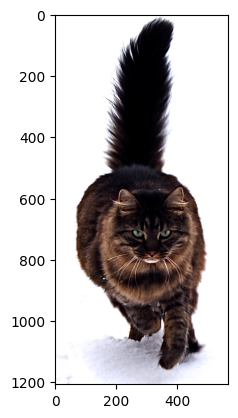

Predicted class: cat


In [14]:
plt.imshow(image)
plt.show()
print(f"Predicted class: {predicted_label}")

In [ ]:
%pip install open_clip_torch

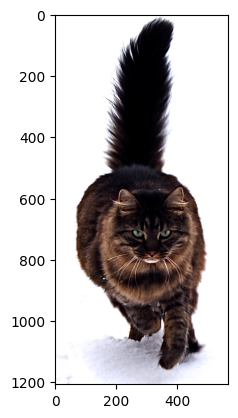

prob: a diagram 5.080327537143603e-05, a dog 0.00019648903980851173, a cat 0.9997527003288269


In [15]:
import torch
from PIL import Image
import open_clip

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')
image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5a/Maine_Coon_cat_by_Tomitheos.JPG"
image_path = "test_image.JPG"
urllib.request.urlretrieve(image_url, image_path)
image = Image.open(image_path).convert("RGB")
image = preprocess(image).unsqueeze(0)
text = tokenizer(["a diagram", "a dog", "a cat"])

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
plt.imshow(Image.open(image_path))
plt.show()

print(f"prob: a diagram {text_probs[0][0]}, a dog {text_probs[0][1]}, a cat {text_probs[0][2]}")